# C.7.10 Lasso 모델

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('2014DC2_dummy_indicator_friendly.csv')   
df.shape

(12417, 193)

In [2]:
# Imputation indicator가 생성됨에 주의

data = df.drop(['EBizSystem2'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
target = df['EBizSystem2']                # 타겟변수만 target에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

# interval 변수의 null value를 평균(mean)으로 impute 및 add_indicator 포함 
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy = 'mean', add_indicator=True)  
X_train2= imp.fit_transform(X_train) 
X_test2= imp.fit_transform(X_test)   # X_train과 and X_test 둘 다 imputation 적용해야 함에 유의

print("X_train2 shape:", X_train2.shape) 
print("X_test2 shape:", X_test2.shape) 

X_train2 shape: (6208, 214)
X_test2 shape: (6209, 214)


In [3]:
# Logistic Regression 모형 (max_iter = 10,000)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1, random_state=0)
model = ls.fit(X_train2, y_train)
pred = model.predict(X_test2)
                            
print("Logreg Training set score:{:.5f}".format(model.score(X_train2, y_train)))
print("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Logreg Training set score:0.74307
Logreg Test set score:0.73313


In [4]:
# Logistic Regression 모형 (max_iter = 10,000)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ls = LogisticRegression(penalty='l1',solver='saga',C=1, max_iter=2000, random_state=0)
model = ls.fit(X_train2, y_train)
pred = model.predict(X_test2)
                            
print("Logreg Training set score:{:.5f}".format(model.score(X_train2, y_train)))
print("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Logreg Training set score:0.74291
Logreg Test set score:0.73265


In [4]:
# Lasso 모델 (Default 모델).
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정합니다.
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':['liblinear', 'saga'], 'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_ls = GridSearchCV(ls, param_grid=params, scoring='accuracy', cv=cross_validation,\
                       n_jobs=-1)
grid_ls.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_ls.best_score_))
print("GridSearchCV best parameter:", (grid_ls.best_params_)) 

GridSearchCV max accuracy:0.72906
GridSearchCV best parameter: {'C': 0.1, 'solver': 'liblinear'}


In [8]:
best_clf = grid_ls.best_estimator_
pred = best_clf.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.73265
ROC AUC on test set:0.79243


In [33]:
import pandas as pd
import numpy as np
df = pd.read_csv('2014DC2_dummy_imp_indicator.csv')   
df.shape

(12417, 215)

In [34]:
# Imputation indicator를 생성하지 않음에 주의

data = df.drop(['EBizSystem2'], axis=1)   # 타겟변수를 제외한 변수만 data 데이터프레임에 저장
target = df['EBizSystem2']                # 타겟변수만 target 데이터프레임에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

# interval 변수의 null value를 평균(mean)으로 impute
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy = 'mean')  
X_train2= imp.fit_transform(X_train) 
X_test2= imp.fit_transform(X_test)   # X_train과 and X_test 둘 다 imputation 적용해야 함에 유의

print("X_train2 shape:", X_train2.shape) 
print("X_test2 shape:", X_test2.shape) 

X_train2 shape: (6208, 214)
X_test2 shape: (6209, 214)


In [35]:
# Lasso 모델 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정합니다.
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':['liblinear', 'saga'], 'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_ls = GridSearchCV(ls, param_grid=params, scoring='accuracy', cv=cross_validation,\
                       n_jobs=-1)
grid_ls.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_ls.best_score_))
print("GridSearchCV best parameter:", (grid_ls.best_params_)) 

GridSearchCV max accuracy:0.72890
GridSearchCV best parameter: {'C': 0.1, 'solver': 'liblinear'}


In [37]:
best_clf = grid_ls.best_estimator_
pred = best_clf.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.73265
ROC AUC on test set:0.79243


In [38]:
print ("Number of features used:", np.sum(best_clf.coef_ != 0))

Number of features used: 72


In [39]:
# 참조 코딩
print('회귀계수', best_clf.coef_)

회귀계수 [[ 0.06549286  0.0128709   0.00248615  0.02890888 -0.01667551  0.02279978
   0.03182523 -0.0257034  -0.00416366  0.01050145 -0.00660946 -0.00411929
  -0.03548163  0.          0.03849525  0.          0.07025396  0.
   0.00445866  0.03524095 -0.00137367 -0.00459849 -0.01078163  0.06979755
   0.00666625  0.01735368  0.00395342 -0.00869677 -0.00150467  0.02112193
   0.00627864  0.02051319  0.          0.12296425  0.10102356 -0.01576888
   0.3728975   0.          0.32103179 -0.3172426   0.02532818  0.20371742
   0.07136717 -1.35344864  0.          0.          0.         -0.36248188
   0.15539975  0.29009987  0.          0.          0.          0.18284171
   0.24159974  0.01491878 -0.18315596  0.09492663  0.          0.
   0.         -0.06959529  0.58785607  0.17816351  0.17782407  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.00156783

In [ ]:
# 아래에서 transpose() 명령 없으면 차원 에러 발생하는 것에 유의

In [40]:
# 변수명을 Index로 만들고 coefficient값을 매칭한 데이터프레임 만들기 
# 원래 계수값의 decimal은 8자리이고 아래 결과에서도 이는 지켜지는데 Python 결과창의 default decimal이 6이라
# 6자리만 표시된 것임. 원래 8자리를 다 보고 싶으면 다음 참조 코딩문 1줄을 실행하면 됨
# pd.options.display.float_format = "{:,.8f}".format

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(best_clf.coef_.transpose(), index=feature_names,
                   columns=['coef'])
dft1 = dft.sort_values(by='coef', ascending=False)   # 컬럼 coef의 값들을 오름차순으로 정리
dft1    

,coef
ParentCompany1,0.587856
IndCategory1_encoded_3.0,0.466660
EBizSystem3,0.372898
Compensation4_5.0,0.328482
EBizSystem5,0.321032
...,...
Asset7_ind,-0.185733
EBizSystem6,-0.317243
Outsourcing1,-0.362482
IndCategory2_72,-0.473748


In [41]:
feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.exp(best_clf.coef_).transpose(), index=feature_names,
                   columns=['Odds_ratio'])
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)   # 컬럼 coef의 값들을 오름차순으로 정리
dft1                                            

,Odds_ratio
ParentCompany1,1.800125
IndCategory1_encoded_3.0,1.594659
EBizSystem3,1.451936
Compensation4_5.0,1.388858
EBizSystem5,1.378549
...,...
Asset7_ind,0.830495
EBizSystem6,0.728154
Outsourcing1,0.695947
IndCategory2_72,0.622664


In [42]:
# Odds ratio가 1(즉, 원 계수값이 0)인 변수들을 제거
dft2 = dft1[dft1['Odds_ratio']!= 1]
dft2.shape

(72, 1)

In [43]:
# 참조 코딩
dft2.describe()

,Odds_ratio
count,72.000000
mean,1.052552
std,0.210030
min,0.258348
25%,0.990825
50%,1.019115
75%,1.112438
max,1.800125


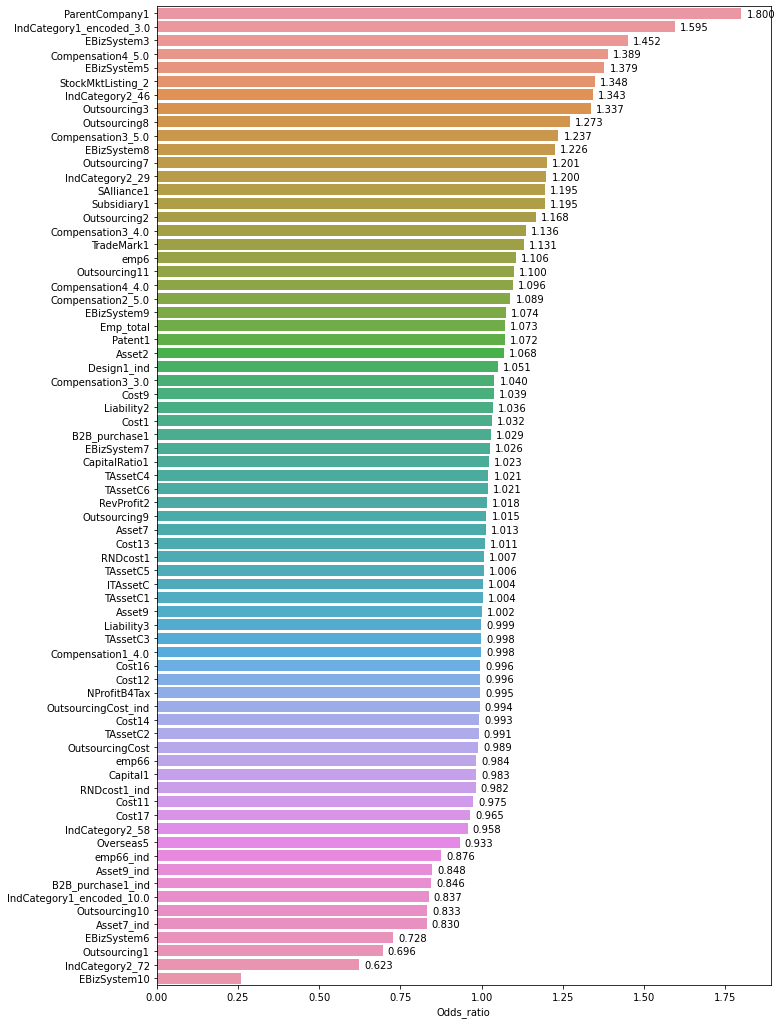

In [17]:
# 데이터프레임 dft2의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(11, 18))
ax = sns.barplot(y=dft2.index, x="Odds_ratio", data=dft2)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.4),
                xytext=(5, 10), textcoords='offset points')

In [34]:
# sm.Logit().fit() 대신에 sm.Logit().fit_regularized(method='l1')을 통해 L1 규제를 도입
# L1 규제를 도입하면 이는 Lasso 모형이 됨

import statsmodels.api as sm 
log_reg = sm.Logit(y_train, X_train2).fit_regularized(maxiter=1100, method='l1')

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5118582518961236
            Iterations: 1013
            Function evaluations: 1017
            Gradient evaluations: 1013


In [35]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:            EBizSystem2   No. Observations:                 6208
Model:                          Logit   Df Residuals:                     5994
Method:                           MLE   Df Model:                          213
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                  0.2521
Time:                        16:31:27   Log-Likelihood:                -3177.6
converged:                       True   LL-Null:                       -4248.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0494      0.043      1.145      0.252      -0.035       0.134
x2             0.0205      0.019      1.091      0.275      -0.016       0.057
x3             0.0161      0.021      0.772      0.4

In [44]:
dft2.shape

(72, 1)

In [45]:
dft2.T.head()

,ParentCompany1,IndCategory1_encoded_3.0,EBizSystem3,Compensation4_5.0,EBizSystem5,StockMktListing_2,IndCategory2_46,Outsourcing3,Outsourcing8,Compensation3_5.0,...,emp66_ind,Asset9_ind,B2B_purchase1_ind,IndCategory1_encoded_10.0,Outsourcing10,Asset7_ind,EBizSystem6,Outsourcing1,IndCategory2_72,EBizSystem10
Odds_ratio,1.800125,1.594659,1.451936,1.388858,1.378549,1.348114,1.342626,1.336561,1.273284,1.236881,...,0.876128,0.847678,0.845628,0.837177,0.832638,0.830495,0.728154,0.695947,0.622664,0.258348


In [46]:
# 컬럼명을 알파벳 순으로 재정렬
dft2_sort = dft2.T.sort_index(axis=1)
dft2_sort.head()

,Asset2,Asset7,Asset7_ind,Asset9,Asset9_ind,B2B_purchase1,B2B_purchase1_ind,Capital1,CapitalRatio1,Compensation1_4.0,...,TAssetC1,TAssetC2,TAssetC3,TAssetC4,TAssetC5,TAssetC6,TradeMark1,emp6,emp66,emp66_ind
Odds_ratio,1.067685,1.012954,0.830495,1.002489,0.847678,1.029331,0.845628,0.983463,1.023062,0.998433,...,1.003961,0.991341,0.998496,1.021347,1.006298,1.020725,1.130844,1.106303,0.984355,0.876128


In [47]:
dft2_sort.columns

Index(['Asset2', 'Asset7', 'Asset7_ind', 'Asset9', 'Asset9_ind',
       'B2B_purchase1', 'B2B_purchase1_ind', 'Capital1', 'CapitalRatio1',
       'Compensation1_4.0', 'Compensation2_5.0', 'Compensation3_3.0',
       'Compensation3_4.0', 'Compensation3_5.0', 'Compensation4_4.0',
       'Compensation4_5.0', 'Cost1', 'Cost11', 'Cost12', 'Cost13', 'Cost14',
       'Cost16', 'Cost17', 'Cost9', 'Design1_ind', 'EBizSystem10',
       'EBizSystem3', 'EBizSystem5', 'EBizSystem6', 'EBizSystem7',
       'EBizSystem8', 'EBizSystem9', 'Emp_total', 'ITAssetC',
       'IndCategory1_encoded_10.0', 'IndCategory1_encoded_3.0',
       'IndCategory2_29', 'IndCategory2_46', 'IndCategory2_58',
       'IndCategory2_72', 'Liability2', 'Liability3', 'NProfitB4Tax',
       'Outsourcing1', 'Outsourcing10', 'Outsourcing11', 'Outsourcing2',
       'Outsourcing3', 'Outsourcing7', 'Outsourcing8', 'Outsourcing9',
       'OutsourcingCost', 'OutsourcingCost_ind', 'Overseas5', 'ParentCompany1',
       'Patent1', 'RNDcost

In [48]:
# LASSO best 모형 결과에서 계수값이 0이 아닌 변수들만 모아서 새로운 데이터프레임 생성
# 여기에 타겟변수(EBizSystem2)를 추가함에 주의
cols = [ 'Asset2', 'Asset7', 'Asset7_ind', 'Asset9', 'Asset9_ind',
       'B2B_purchase1', 'B2B_purchase1_ind', 'Capital1', 'CapitalRatio1',
       'Compensation1_4.0', 'Compensation2_5.0', 'Compensation3_3.0',
       'Compensation3_4.0', 'Compensation3_5.0', 'Compensation4_4.0',
       'Compensation4_5.0', 'Cost1', 'Cost11', 'Cost12', 'Cost13', 'Cost14',
       'Cost16', 'Cost17', 'Cost9', 'Design1_ind', 'EBizSystem10',
       'EBizSystem3', 'EBizSystem5', 'EBizSystem6', 'EBizSystem7',
       'EBizSystem8', 'EBizSystem9', 'Emp_total', 'ITAssetC',
       'IndCategory1_encoded_10.0', 'IndCategory1_encoded_3.0',
       'IndCategory2_29', 'IndCategory2_46', 'IndCategory2_58',
       'IndCategory2_72', 'Liability2', 'Liability3', 'NProfitB4Tax',
       'Outsourcing1', 'Outsourcing10', 'Outsourcing11', 'Outsourcing2',
       'Outsourcing3', 'Outsourcing7', 'Outsourcing8', 'Outsourcing9',
       'OutsourcingCost', 'OutsourcingCost_ind', 'Overseas5', 'ParentCompany1',
       'Patent1', 'RNDcost1', 'RNDcost1_ind', 'RevProfit2', 'SAlliance1',
       'StockMktListing_2', 'Subsidiary1', 'TAssetC1', 'TAssetC2', 'TAssetC3',
       'TAssetC4', 'TAssetC5', 'TAssetC6', 'TradeMark1', 'emp6', 'emp66',
       'emp66_ind','EBizSystem2']
dft2_sort_target = df[cols]
dft2_sort_target.shape

(12417, 73)

In [49]:
dft2_sort_target.to_csv("Lasso_select_ERP.csv", index=False)

# 이하는 추가적인 코딩문임

# 표준화된 데이터로 Lasso 실행

In [39]:
import pandas as pd
import numpy as np
dfu= pd.read_csv('ERP_standard.csv')   
dfu.shape

(12417, 193)

In [40]:
dfu.head(3)

,Asset2,Asset7,Asset9,B2B_purchase1,Capital1,CapitalRatio1,Cost1,Cost11,Cost12,Cost13,...,IndCategory1_encoded_8.0,IndCategory1_encoded_9.0,IndCategory1_encoded_10.0,IndCategory1_encoded_11.0,IndCategory1_encoded_12.0,IndCategory1_encoded_13.0,IndCategory1_encoded_14.0,IndCategory1_encoded_15.0,IndCategory1_encoded_16.0,IndCategory1_encoded_17.0
0,0.467982,0.862735,0.324257,0.456038,0.470391,-0.372859,0.678708,0.764818,-0.121246,0.369504,...,0,0,0,0,0,0,0,0,0,0
1,1.332315,1.871731,1.467463,0.973183,1.407158,-0.372859,0.870163,1.366775,-0.177425,-0.863224,...,0,0,0,0,0,0,0,0,0,0
2,0.161186,1.009598,-0.827886,0.499167,0.262171,-0.372859,0.641947,0.775461,-0.682654,-0.863224,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Imputation indicator가 생성됨에 주의

data = dfu.drop(['EBizSystem2'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
target = dfu['EBizSystem2']                # 타겟변수만 target에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

# interval 변수의 null value를 평균(mean)으로 impute 및 add_indicator 포함 
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy = 'mean', add_indicator=True)  
X_train2= imp.fit_transform(X_train) 
X_test2= imp.fit_transform(X_test)   # X_train과 and X_test 둘 다 imputation 적용해야 함에 유의

print("X_train2 shape:", X_train2.shape) 
print("X_test2 shape:", X_test2.shape) 

X_train2 shape: (6208, 214)
X_test2 shape: (6209, 214)


In [42]:
# Lasso 모델 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)

In [43]:
from sklearn.model_selection import GridSearchCV
# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':['liblinear', 'saga'], 'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_ls = GridSearchCV(ls, param_grid=params, scoring='accuracy', cv=cross_validation,\
                       n_jobs=-1)
grid_ls.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_ls.best_score_))
print("GridSearchCV best parameter:", (grid_ls.best_params_)) 

GridSearchCV max accuracy:0.73067
GridSearchCV best parameter: {'C': 0.1, 'solver': 'saga'}


In [44]:
best_clf = grid_ls.best_estimator_
pred = best_clf.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.73120
ROC AUC on test set:0.79155


In [ ]:
### 결론: 변수가 수백개인 ERP 모델에서 Standardization의 효과는 크지 않을 수 있음. 오히려 정확도가 줄어들 수 있음

In [46]:
print ("Number of features used:", np.sum(best_clf.coef_ != 0))

Number of features used: 64


# 표준화된 데이터로 실행한 LASSO 모델에 의해 선택된 변수를 csv 파일로 저장

In [74]:
import pandas as pd
import numpy as np
df = pd.read_csv('2014DC2_dummy_imp_indicator.csv')   
df.shape

(12417, 215)

In [48]:
pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화

In [75]:
df.max() - df.min()

Asset2                       17.795026
Asset7                       17.730728
Asset9                       14.989356
B2B_purchase1                17.480755
Capital1                     18.703429
CapitalRatio1                 4.615121
Cost1                        18.412535
Cost11                       12.542220
Cost12                       14.726344
Cost13                       13.909209
Cost14                       18.063078
Cost16                       13.274834
Cost17                       12.662716
Cost2                        16.329646
Cost9                        13.205076
Design1                       8.999002
Emp_total                    10.799290
EquityShareCapital           10.308767
ITAssetC                     14.320115
Liability2                   19.334597
Liability3                   17.035052
NProfitB4Tax                 16.665097
OutsourcingCost              16.065830
Patent1                      10.623690
RNDcost1                     16.436981
RevProfit2               

In [50]:
# 구간 변수들만 별도로 모아 데이터프레임 df_num을 만들기
numeric_cols = ['Asset2','Asset7','Asset9','B2B_purchase1','Capital1','CapitalRatio1',\
                'Cost1','Cost11','Cost12','Cost13','Cost14','Cost16','Cost17','Cost2',\
                'Cost9','Design1','Emp_total','EquityShareCapital','ITAssetC','Liability2',\
                'Liability3','NProfitB4Tax','OutsourcingCost','Patent1','RNDcost1',\
                'RevProfit2','TAssetC1','TAssetC2','TAssetC3','TAssetC4','TAssetC5',\
                'TAssetC6','TAssetC8','TradeMark1','emp6','emp66']
df_num = df[numeric_cols]

# StandardScaler( )로 데이터 스케일 표준화를 실행하고 결과를 데이터프레임으로 만들기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard_scaled = pd.DataFrame(scaler.fit_transform(df_num))

# StandardScaler( )는 변수명을 지우기 때문에, 새로 만든 데이터프레임에 다시 변수명을 삽입
df_num_standard_scaled.columns = df_num.columns
df_num_standard_scaled.head()

,Asset2,Asset7,Asset9,B2B_purchase1,Capital1,CapitalRatio1,Cost1,Cost11,Cost12,Cost13,Cost14,Cost16,Cost17,Cost2,Cost9,Design1,Emp_total,EquityShareCapital,ITAssetC,Liability2,Liability3,NProfitB4Tax,OutsourcingCost,Patent1,RNDcost1,RevProfit2,TAssetC1,TAssetC2,TAssetC3,TAssetC4,TAssetC5,TAssetC6,TAssetC8,TradeMark1,emp6,emp66
0,0.467982,0.862735,0.324257,0.456038,0.470391,-0.372859,0.678708,0.764818,-0.121246,0.369504,1.022271,1.008824,0.740100,0.316287,0.209781,NaN,0.594367,1.283755,-0.744997,0.463431,1.172527,-1.646141,NaN,NaN,NaN,1.322521,0.066971,-0.472042,-0.622519,-0.489985,-0.986725,1.019111,1.510670,NaN,0.344221,-0.505843
1,1.332315,1.871731,1.467463,0.973183,1.407158,-0.372859,0.870163,1.366775,-0.177425,-0.863224,1.377624,0.825015,2.583997,1.561299,0.962477,-0.436618,1.368367,0.670107,-0.744997,0.912985,0.861830,1.279380,-0.587376,-0.742988,NaN,1.916620,-0.365006,-0.472042,-0.622519,-0.489985,-0.986725,-0.899169,1.033115,0.461943,1.570157,-0.505843
2,0.161186,1.009598,-0.827886,0.499167,0.262171,-0.372859,0.641947,0.775461,-0.682654,-0.863224,1.114814,0.922970,0.853060,-0.082747,-2.039459,0.242889,0.083132,-0.021702,-0.744997,0.910147,-0.169344,0.634003,-2.279667,0.030642,NaN,0.934123,-0.075584,1.232742,-0.394810,-0.489985,0.494827,0.307446,-0.510022,1.427509,0.577291,-0.505843
3,0.161186,-0.498898,NaN,NaN,0.199515,-0.372859,0.478863,-0.001573,-0.209136,-0.863224,0.936979,0.172613,0.513406,-0.152487,0.052127,-0.436618,-0.085707,0.023757,-0.744997,0.015302,0.325365,0.188870,NaN,-0.742988,NaN,0.327849,0.225693,-0.472042,-0.622519,-0.489985,-0.986725,1.861656,-0.510022,-0.717909,-0.415905,-0.505843
4,-0.649704,-1.436567,-0.972148,-0.436800,-0.339939,-0.372859,-0.134089,-0.561771,-0.830425,-0.863224,-0.085885,-1.749297,-0.086266,-1.171164,-0.596248,-0.436618,-0.630549,0.048543,-0.744997,-1.426186,-0.764930,-0.000832,NaN,-0.742988,NaN,-0.643487,0.236909,-0.472042,0.829135,1.817055,0.523263,-0.899169,1.511631,-0.717909,-1.204135,0.366023


In [51]:
df1 = df.drop(numeric_cols, axis=1) # 원래 데이터프레임 df에서 구간변수들을 제거하여 df1에 저장
df1.columns                         # df1의 변수명을 나열

Index(['EBizSystem2', 'EBizSystem3', 'EBizSystem4', 'EBizSystem5',
       'EBizSystem6', 'EBizSystem7', 'EBizSystem8', 'EBizSystem9',
       'EBizSystem10', 'EBizSystem11',
       ...
       'Patent1_ind', 'TAssetC1_ind', 'TAssetC2_ind', 'TAssetC3_ind',
       'TAssetC4_ind', 'TAssetC5_ind', 'TAssetC6_ind', 'TAssetC8_ind',
       'TradeMark1_ind', 'emp66_ind'],
      dtype='object', length=179)

In [52]:
# 구간변수 스케일을 표준화한 df_num_standard_scaled와 구간 변수만 없는 df1을 병합
dfu_standard = pd.concat([df_num_standard_scaled, df1], axis=1)
dfu_standard.columns   # dfu의 변수명을 출력

Index(['Asset2', 'Asset7', 'Asset9', 'B2B_purchase1', 'Capital1',
       'CapitalRatio1', 'Cost1', 'Cost11', 'Cost12', 'Cost13',
       ...
       'Patent1_ind', 'TAssetC1_ind', 'TAssetC2_ind', 'TAssetC3_ind',
       'TAssetC4_ind', 'TAssetC5_ind', 'TAssetC6_ind', 'TAssetC8_ind',
       'TradeMark1_ind', 'emp66_ind'],
      dtype='object', length=215)

In [53]:
dfu_standard.shape

(12417, 215)

In [54]:
dfu_standard.to_csv('standard_ERP_imp_indicator.csv', index=False)  # 병합한 데이터프레임을 csv 형태로 저장

In [24]:
import pandas as pd
import numpy as np
df= pd.read_csv('standard_ERP_imp_indicator.csv')   
df.shape

(12417, 215)

In [25]:
df.head(3)

,Asset2,Asset7,Asset9,B2B_purchase1,Capital1,CapitalRatio1,Cost1,Cost11,Cost12,Cost13,...,Patent1_ind,TAssetC1_ind,TAssetC2_ind,TAssetC3_ind,TAssetC4_ind,TAssetC5_ind,TAssetC6_ind,TAssetC8_ind,TradeMark1_ind,emp66_ind
0,0.467982,0.862735,0.324257,0.456038,0.470391,-0.372859,0.678708,0.764818,-0.121246,0.369504,...,1,0,0,0,0,0,0,0,1,0
1,1.332315,1.871731,1.467463,0.973183,1.407158,-0.372859,0.870163,1.366775,-0.177425,-0.863224,...,0,0,0,0,0,0,0,0,0,0
2,0.161186,1.009598,-0.827886,0.499167,0.262171,-0.372859,0.641947,0.775461,-0.682654,-0.863224,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Imputation indicator를 생성하지 않음에 주의

data = df.drop(['EBizSystem2'], axis=1)   # 타겟변수를 제외한 변수만 data 데이터프레임에 저장
target = df['EBizSystem2']                # 타겟변수만 target 데이터프레임에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의

# interval 변수의 null value를 평균(mean)으로 impute
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy = 'mean')  
X_train2= imp.fit_transform(X_train) 
X_test2= imp.fit_transform(X_test)   # X_train과 and X_test 둘 다 imputation 적용해야 함에 유의

print("X_train2 shape:", X_train2.shape) 
print("X_test2 shape:", X_test2.shape) 

X_train2 shape: (6208, 214)
X_test2 shape: (6209, 214)


In [27]:
# Lasso 모델 (Default 모델).
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf_ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)
clf_ls.fit(X_train2, y_train)
pred = clf_ls.predict(X_test2)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold 

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':['liblinear', 'saga'], 'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_ls = GridSearchCV(clf_ls, param_grid=params, scoring='accuracy', cv=cross_validation,
                       n_jobs=-1)
grid_ls.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_ls.best_score_))
print("GridSearchCV best parameter:", (grid_ls.best_params_)) 

GridSearchCV max accuracy:0.73067
GridSearchCV best parameter: {'C': 0.1, 'solver': 'saga'}


In [29]:
best_clf = grid_ls.best_estimator_
pred = best_clf.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.73120
ROC AUC on test set:0.79155


In [30]:
print ("Number of features used:", np.sum(best_clf.coef_ != 0))

Number of features used: 64


In [31]:
print('회귀계수', best_clf.coef_)

회귀계수 [[ 1.90542581e-01  2.52419123e-02  0.00000000e+00  7.68495928e-02
  -3.02208468e-02  6.69419549e-03  1.13019654e-01 -4.80466579e-02
  -3.58352272e-02  2.95596154e-03  0.00000000e+00  0.00000000e+00
  -8.91022586e-02  9.08408319e-02  6.36133577e-02  1.55764155e-03
   1.12133655e-01  5.96123423e-02  0.00000000e+00  8.69021845e-02
   0.00000000e+00 -1.31672811e-02 -1.02795823e-02  1.03394353e-01
   1.66031795e-02  9.90449417e-03  0.00000000e+00 -1.85051995e-02
  -2.29544619e-04  2.49870652e-02  0.00000000e+00  4.94591433e-02
   0.00000000e+00  1.69848008e-01  1.05046271e-01 -1.91373517e-02
   3.56637900e-01  0.00000000e+00  2.72740485e-01 -3.21776602e-01
   3.12463869e-02  1.91328179e-01  8.02785024e-02 -1.35422066e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.08973033e-01
   1.64873761e-01  2.76027728e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.95644743e-01  2.44481957e-01  1.18651511e-02
  -1.34914556e-01  1.04133300e-01  0.00000000e+00  0.00000000e+00
   0.

In [32]:
# 변수명을 Index로 만들고 coefficient값을 매칭한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(best_clf.coef_.transpose(), index=feature_names,
                   columns=['coef'])
dft1 = dft.sort_values(by='coef', ascending=True)   # 컬럼 coef의 값들을 오름차순으로 정리
dft1    

,coef
EBizSystem10,-1.354221
IndCategory2_72,-0.395254
EBizSystem6,-0.321777
Outsourcing1,-0.308973
B2B_purchase1_ind,-0.147092
...,...
Compensation4_5.0,0.329644
EBizSystem3,0.356638
IndCategory2_46,0.362229
ParentCompany1,0.569371


In [33]:
dft_selected = dft1[dft1['coef']!= 0]
dft_selected.shape

(64, 1)

In [34]:
dft_selected.T.head()

,EBizSystem10,IndCategory2_72,EBizSystem6,Outsourcing1,B2B_purchase1_ind,Asset7_ind,Asset9_ind,Outsourcing10,IndCategory1_encoded_10.0,Cost17,...,Compensation3_5.0,Outsourcing8,StockMktListing_2,EBizSystem5,Outsourcing3,Compensation4_5.0,EBizSystem3,IndCategory2_46,ParentCompany1,IndCategory1_encoded_3.0
coef,-1.354221,-0.395254,-0.321777,-0.308973,-0.147092,-0.140816,-0.140483,-0.134915,-0.094393,-0.089102,...,0.241479,0.244482,0.250384,0.27274,0.276028,0.329644,0.356638,0.362229,0.569371,0.575599


In [35]:
dft_selected.T.columns

Index(['EBizSystem10', 'IndCategory2_72', 'EBizSystem6', 'Outsourcing1',
       'B2B_purchase1_ind', 'Asset7_ind', 'Asset9_ind', 'Outsourcing10',
       'IndCategory1_encoded_10.0', 'Cost17', 'emp66_ind', 'Cost11', 'Cost12',
       'Capital1', 'IndCategory2_58', 'emp66', 'TAssetC2', 'NProfitB4Tax',
       'OutsourcingCost', 'TAssetC3', 'Design1', 'Cost13', 'CapitalRatio1',
       'RevProfit2', 'Outsourcing9', 'RNDcost1', 'TAssetC4', 'Asset7',
       'EBizSystem7', 'TAssetC6', 'Compensation3_3.0', 'EquityShareCapital',
       'Compensation2_5.0', 'Cost9', 'Design1_ind', 'B2B_purchase1',
       'EBizSystem9', 'Liability2', 'Cost2', 'Compensation4_4.0', 'Patent1',
       'Outsourcing11', 'emp6', 'Emp_total', 'Cost1', 'Compensation3_4.0',
       'Outsourcing2', 'TradeMark1', 'IndCategory2_29', 'Asset2',
       'EBizSystem8', 'Subsidiary1', 'SAlliance1', 'Outsourcing7',
       'Compensation3_5.0', 'Outsourcing8', 'StockMktListing_2', 'EBizSystem5',
       'Outsourcing3', 'Compensation4_5.0'

In [36]:
# LASSO best 모형 결과에서 계수값이 0이 아닌 변수들만 모아서 새로운 데이터프레임 생성
# 여기에 타겟변수(EBizSystem2)를 추가함에 주의
cols = ['EBizSystem10', 'IndCategory2_72', 'EBizSystem6', 'Outsourcing1',\
        'B2B_purchase1_ind', 'Asset7_ind', 'Asset9_ind', 'Outsourcing10',\
        'IndCategory1_encoded_10.0', 'Cost17', 'emp66_ind', 'Cost11', 'Cost12',\
        'Capital1', 'IndCategory2_58', 'emp66', 'TAssetC2', 'NProfitB4Tax',\
        'OutsourcingCost', 'TAssetC3', 'Design1', 'Cost13', 'CapitalRatio1',\
        'RevProfit2', 'Outsourcing9', 'RNDcost1', 'TAssetC4', 'Asset7',\
        'EBizSystem7', 'TAssetC6', 'Compensation3_3.0', 'EquityShareCapital',\
        'Compensation2_5.0', 'Cost9', 'Design1_ind', 'B2B_purchase1',\
        'EBizSystem9', 'Liability2', 'Cost2', 'Compensation4_4.0', 'Patent1',\
        'Outsourcing11', 'emp6', 'Emp_total', 'Cost1', 'Compensation3_4.0',\
        'Outsourcing2', 'TradeMark1', 'IndCategory2_29', 'Asset2',\
        'EBizSystem8', 'Subsidiary1', 'SAlliance1', 'Outsourcing7',\
        'Compensation3_5.0', 'Outsourcing8', 'StockMktListing_2', 'EBizSystem5',\
        'Outsourcing3', 'Compensation4_5.0', 'EBizSystem3', 'IndCategory2_46',\
        'ParentCompany1', 'IndCategory1_encoded_3.0', 'EBizSystem2']
dft_selected_target = df[cols]
dft_selected_target.shape

(12417, 65)

In [37]:
dft_selected_target= dft_selected_target.sort_index(axis=1)   # 컬럼명을 알파벳 순으로 정렬
dft_selected_target.head(3)

,Asset2,Asset7,Asset7_ind,Asset9_ind,B2B_purchase1,B2B_purchase1_ind,Capital1,CapitalRatio1,Compensation2_5.0,Compensation3_3.0,...,StockMktListing_2,Subsidiary1,TAssetC2,TAssetC3,TAssetC4,TAssetC6,TradeMark1,emp6,emp66,emp66_ind
0,0.467982,0.862735,0,0,0.456038,0,0.470391,-0.372859,0,0,...,0,1,-0.472042,-0.622519,-0.489985,1.019111,NaN,0.344221,-0.505843,0
1,1.332315,1.871731,0,0,0.973183,0,1.407158,-0.372859,0,0,...,0,1,-0.472042,-0.622519,-0.489985,-0.899169,0.461943,1.570157,-0.505843,0
2,0.161186,1.009598,0,0,0.499167,0,0.262171,-0.372859,1,0,...,0,1,1.232742,-0.394810,-0.489985,0.307446,1.427509,0.577291,-0.505843,0


In [38]:
dft_selected_target.to_csv("Lasso_select_standard_ERP.csv", index=False)